# Posterior Predictive Checks

How well does the model fit the data?
Note that a Bayesian model does not just return a point estimate as a prediction but always a distribution. It is thus not sufficient to just check if such point estimate is close to the true value but we need to check that the posterior predictive distribution is a good fit.

In [1]:
import sys
sys.path.append('../src/')

import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import seaborn as sns

import matplotlib.pyplot as plt
from utils.data_utils import load_data
from utils.plot_utils import set_plot_defaults
from utils.ppc_utils import plot_ppc

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/corrie/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
set_plot_defaults("Europace Sans")
d, _, _ = load_data(kind="prices")   # loads data from data/interim_data/houses.csv 
                                     # aternatively, use kind="rents" to load data from data/interim_data/rent.csv

In [3]:
inf_data = az.from_netcdf("../models/centered_hier.nc")
inf_data

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data
	> constant_data

One way to analyse how well the model fits the data is to compare the distribution of our observed data with the distribution of predicted data.

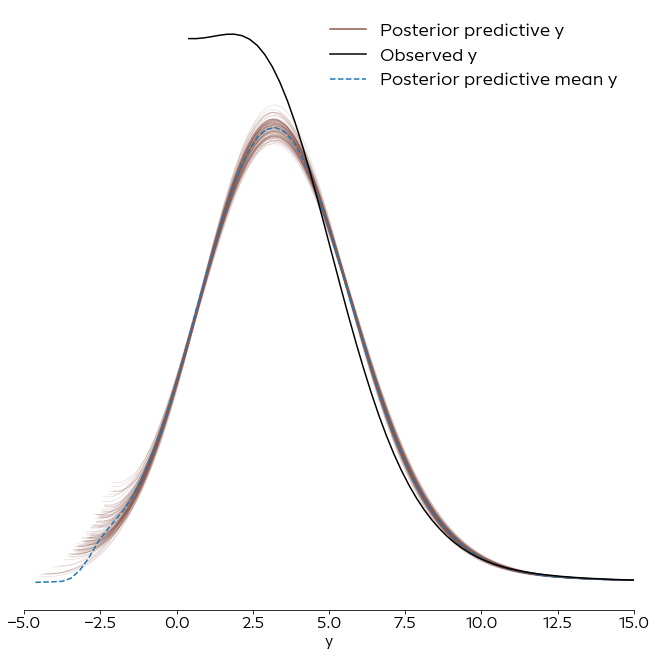

In [4]:
ax = az.plot_ppc(inf_data, kind="density", num_pp_samples=100)
ax[0].spines["top"].set_visible(False)  
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].set_xlim(-5, 15)
ax[0].legend(frameon=False,  markerscale=3., loc="upper right")
plt.show()

In [5]:
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['font.size'] = 20

Another way of visualizing the same information is to instead compare histograms of the observed data versus some random samples from the posterior predictive distribution.

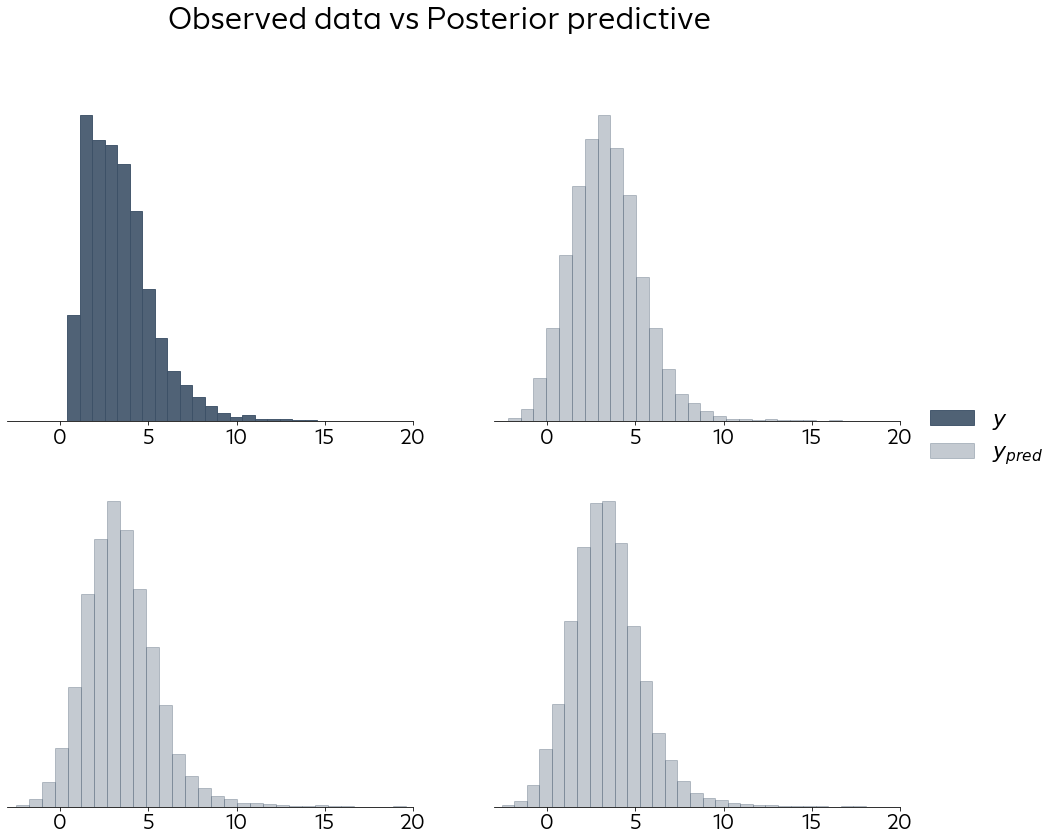

In [6]:
plot_ppc(inf_data, kind="hist")
plt.show()

Yet another way of visualizing the same information:

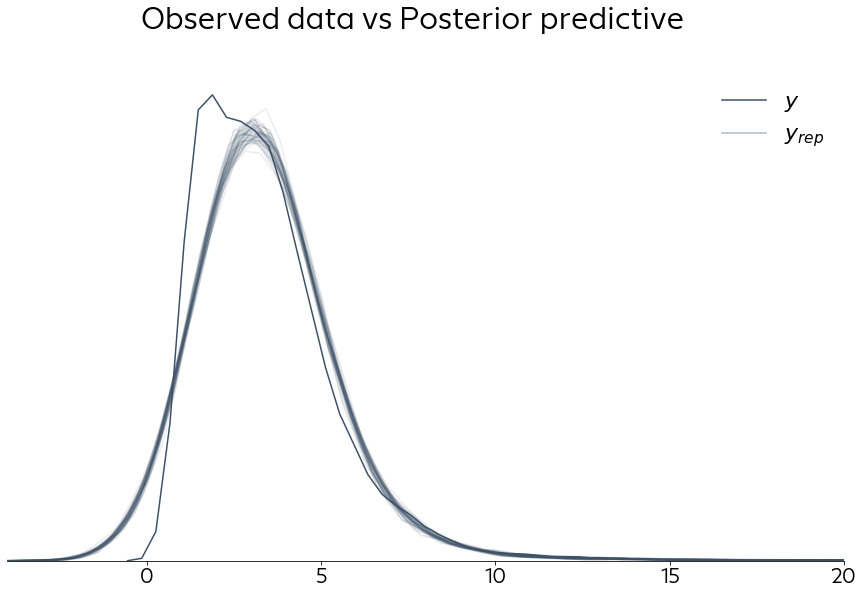

In [7]:
fig, ax = plot_ppc(inf_data, kind="density", n=50)
plt.show()

We can also of course reduce the posterior predictive distribution to a point estimate and then check how close this value is to the real value. In the following visualization, they should ideally all be close to the diagonal.

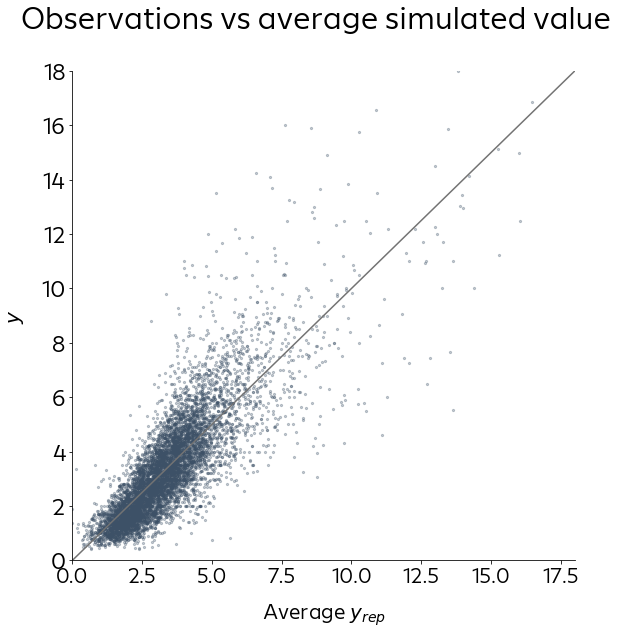

In [8]:
plot_ppc(inf_data, kind="scatter")
plt.show()

Especially for the more pricy objects, our model seems to underestimate the prices and the points are quite far from the diagonal. For the houses in the lower/average prices, the model seems fine, though it seems here to overestimate the prices a bit.